<a href="https://colab.research.google.com/github/Aselebe/Prediction/blob/main/Data_Handling_and_Processing_with_PySpark_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Data Handling and Processing with PySpark

In this assignment, you will be analysing the popularity of films and TV shows on the streaming platform, Netflix. Using your knowledge of PySpark DataFrames and Spark SQL, you will produce a number of "downstream" data products to analyse trends in global streaming habits.

Download the dataset from this [Kaggle](https://www.kaggle.com/dhruvildave/netflix-top-10-tv-shows-and-films) page. A copy of the `all_weeks_countries.csv` file is also available on the canvas page for this assignment.

Your task is to load in the data and produce a number of "downstream" data products and plots as described below.

The PySpark installation and setup is provided below for conveinience.

In [ ]:
# Apache Spark uses Java, so first we must install that
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# Mount Google Drive and unpack Spark
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!tar xzf /content/drive/MyDrive/spark-3.3.0-bin-hadoop3.tgz.tgz

In [ ]:
# Set up environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop3"

In [ ]:
# Install findspark, which helps python locate the psyspark module files
!pip install -q findspark
import findspark
findspark.init()

In [ ]:
# Finally, we initialse a "SparkSession", which handles the computations
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()



1.   Load the `all_weeks_countries.csv` into your Colab Notebook as a DataFrame.
2.   Create two separate DataFrames for Films and TV.
3.   For the Films data, drop the column containing the season names.
4.   For the TV data, replace any null values in the season name column with the show name.

In [ ]:
# pyspark.sql.functions countains all the transformations and actions you will
# need
from pyspark.sql import functions as F

In [ ]:
### Load the all_weeks_countries.csv into your Colab Notebook as a DataFrame.
usersCsvPath = "/content/drive/MyDrive/all-weeks-countries.csv"

all_weeks_countries = (spark
             .read
             .option('header', True)
             .option('inferSchema', True)
             .csv(usersCsvPath))

In [ ]:
### Display the table and its schema

# Displaying table
all_weeks_countries.show()

# Displaying the schema
all_weeks_countries.printSchema()


+------------+------------+-------------------+--------+-----------+--------------------+--------------------+--------------------------+
|country_name|country_iso2|               week|category|weekly_rank|          show_title|        season_title|cumulative_weeks_in_top_10|
+------------+------------+-------------------+--------+-----------+--------------------+--------------------+--------------------------+
|   Argentina|          AR|2022-08-21 00:00:00|   Films|          1|      Look Both Ways|                null|                         1|
|   Argentina|          AR|2022-08-21 00:00:00|   Films|          2|           Day Shift|                null|                         2|
|   Argentina|          AR|2022-08-21 00:00:00|   Films|          3|Bank Robbers: The...|                null|                         2|
|   Argentina|          AR|2022-08-21 00:00:00|   Films|          4|   The Next 365 Days|                null|                         1|
|   Argentina|          AR|2022-08

In [ ]:
### Seperate the data into two DataFrames for Films and TV

from pyspark.sql.functions import col, coalesce, isnull, count

# Filter the data for films
filmsDF = all_weeks_countries.filter(all_weeks_countries.category == 'Films')

# Filter the data for TV
tvDF = all_weeks_countries.filter(all_weeks_countries.category == 'TV')

In [ ]:
filmsDF.show()

+------------+------------+-------------------+--------+-----------+--------------------+------------+--------------------------+
|country_name|country_iso2|               week|category|weekly_rank|          show_title|season_title|cumulative_weeks_in_top_10|
+------------+------------+-------------------+--------+-----------+--------------------+------------+--------------------------+
|   Argentina|          AR|2022-08-21 00:00:00|   Films|          1|      Look Both Ways|        null|                         1|
|   Argentina|          AR|2022-08-21 00:00:00|   Films|          2|           Day Shift|        null|                         2|
|   Argentina|          AR|2022-08-21 00:00:00|   Films|          3|Bank Robbers: The...|        null|                         2|
|   Argentina|          AR|2022-08-21 00:00:00|   Films|          4|   The Next 365 Days|        null|                         1|
|   Argentina|          AR|2022-08-21 00:00:00|   Films|          5|The Angry Birds M...| 

In [ ]:
### Drop the 'season_title' column from the Films DataFrame, display the table


filmsDF = filmsDF.drop("season_title")
filmsDF.show()


+------------+------------+-------------------+--------+-----------+--------------------+--------------------------+
|country_name|country_iso2|               week|category|weekly_rank|          show_title|cumulative_weeks_in_top_10|
+------------+------------+-------------------+--------+-----------+--------------------+--------------------------+
|   Argentina|          AR|2022-08-21 00:00:00|   Films|          1|      Look Both Ways|                         1|
|   Argentina|          AR|2022-08-21 00:00:00|   Films|          2|           Day Shift|                         2|
|   Argentina|          AR|2022-08-21 00:00:00|   Films|          3|Bank Robbers: The...|                         2|
|   Argentina|          AR|2022-08-21 00:00:00|   Films|          4|   The Next 365 Days|                         1|
|   Argentina|          AR|2022-08-21 00:00:00|   Films|          5|The Angry Birds M...|                         1|
|   Argentina|          AR|2022-08-21 00:00:00|   Films|        

In [ ]:
### Replace any null values in 'season_name' in the TV DataFrame with the
### corresponding 'show_name', display the table

tvDF = tvDF.withColumn("season_title", F.when(F.col("season_title").isNull(),
                  F.col("show_title")).otherwise(F.col("season_title")))

#tvDF = tvDF.replace("null", 0, "season_title")


In [ ]:
tvDF.show()

+------------+------------+-------------------+--------+-----------+--------------------+--------------------+--------------------------+
|country_name|country_iso2|               week|category|weekly_rank|          show_title|        season_title|cumulative_weeks_in_top_10|
+------------+------------+-------------------+--------+-----------+--------------------+--------------------+--------------------------+
|   Argentina|          AR|2022-08-21 00:00:00|      TV|          1| Pasión de Gavilanes|Pasión de Gavilan...|                         5|
|   Argentina|          AR|2022-08-21 00:00:00|      TV|          2|        Another Self|Another Self: Sea...|                         4|
|   Argentina|          AR|2022-08-21 00:00:00|      TV|          3| Pasión de Gavilanes|Pasión de Gavilan...|                        58|
|   Argentina|          AR|2022-08-21 00:00:00|      TV|          4|            Manifest|  Manifest: Season 1|                         6|
|   Argentina|          AR|2022-08

Most popular films by country (10 Marks)

1.   For each country in the data, find the highest rank each film reached, and the number of weeks it spent in the top 10. (4 marks)
2.   Produce a DataFrame that contains the film which spent the most time in each country's top 10. (4 marks)
3.   Produce a pie chart which shows how many countries the most popular films occurred in. (2 marks)


In [ ]:
### Group the data by 'country_name' and 'show_title' and find the highest
### weekly rank and total weeks spent in the top 10 for each film, display the
### data
# .groupBy, .agg, F.max, F.min, .sort, .show
films_rank_DF = (filmsDF
                .groupBy("country_name", "show_title")
                .agg(F.max("weekly_rank").alias("max_weekly_rank"),
                  F.max("cumulative_weeks_in_top_10").alias("max_cumulative"))
                .sort(F.desc('max_weekly_rank')))

films_rank_DF.show()

+------------------+--------------------+---------------+--------------+
|      country_name|          show_title|max_weekly_rank|max_cumulative|
+------------------+--------------------+---------------+--------------+
|             Qatar|  The Girl Next Door|             10|             2|
|Dominican Republic|      Last Christmas|             10|             1|
|           Romania|    The Skeleton Key|             10|             1|
|            Canada|   Indecent Proposal|             10|             1|
|           Réunion|     Office Invasion|             10|             1|
|           Finland| Saving Private Ryan|             10|             1|
|      Saudi Arabia|The Amazing Spide...|             10|             2|
|         Hong Kong|    The Adam Project|             10|             5|
|      Saudi Arabia|      The Ninth Gate|             10|             1|
|           Ireland|        Man of Steel|             10|             2|
|      Saudi Arabia|Fistful of Vengeance|          

Produce a DataFrame which shows, for each country, the most popular film by the number of weeks it spent in the top 10, how many weeks that film was in the top 10, and the highest weekly rank it reached.

In [ ]:
### Find the film that spent the most time in each country's top 10 list.
### Produce and display a table showing that information, along with the number
### of weeks spent in the top 10, and the highest weekly ranking
# .groupBy, .sort, .desc, .agg, F.first, .show
from pyspark.sql import Column, Window

## Grouping by country and show title, finding the max cumulative weeks and the max weekly rank
max_weeks_df = filmsDF.groupBy("country_name", "show_title") \
                     .agg(F.max("cumulative_weeks_in_top_10").alias("max_weeks"),
                          F.max("weekly_rank").alias("max_rank"))

## Ranking the films by their max weeks within each country
rank_df = max_weeks_df.withColumn("rank", F.row_number()
        .over(Window.partitionBy("country_name").orderBy(F.desc("max_weeks"))))

# show the result with additional columns for weeks and rank
results_df = rank_df.select("country_name", "show_title",
                            "max_weeks", "max_rank") \
                     .filter("rank = 1") \
                     .orderBy("country_name")

results_df.show()


+------------------+--------------------+---------+--------+
|      country_name|          show_title|max_weeks|max_rank|
+------------------+--------------------+---------+--------+
|         Argentina|  Sonic the Hedgehog|        7|       9|
|         Australia| Back to the Outback|        8|      10|
|           Austria|Harry Potter and ...|        9|      10|
|           Bahamas|  A Madea Homecoming|        9|      10|
|           Bahrain|          Red Notice|        8|       9|
|        Bangladesh|        Sooryavanshi|       21|      10|
|           Belgium|    The Adam Project|        8|      10|
|           Bolivia|               Shrek|       18|      10|
|            Brazil|Hotel Transylvani...|        7|      10|
|          Bulgaria|          Red Notice|       15|      10|
|            Canada|How the Grinch St...|        7|       9|
|             Chile|  Sonic the Hedgehog|        8|      10|
|          Colombia|          Red Notice|       12|      10|
|        Costa Rica|  So

Group the DataFrame by `season_title` and count the number of countries where each season is the most popular. Convert the DataFrame to Pandas, and use the `DataFrame.plot.pie` method to produce a pie chart of the most popular shows.

+--------------------+-------------------+
|          show_title|number_of_countries|
+--------------------+-------------------+
|          Red Notice|                 49|
|  Sonic the Hedgehog|                  8|
|Hotel Transylvani...|                  5|
|        Sooryavanshi|                  5|
|    The Adam Project|                  3|
|       Don't Look Up|                  2|
|Harry Potter and ...|                  2|
|Upin & Ipin: The ...|                  1|
|The Man from Toronto|                  1|
|How I Fell in Lov...|                  1|
|               Shrek|                  1|
| Gangubai Kathiawadi|                  1|
|              Hustle|                  1|
|         Asakusa Kid|                  1|
|The Secret Life o...|                  1|
|   Night in Paradise|                  1|
|  A Madea Homecoming|                  1|
|The Humans and th...|                  1|
|        The Takedown|                  1|
|         Man in Love|                  1|
+----------

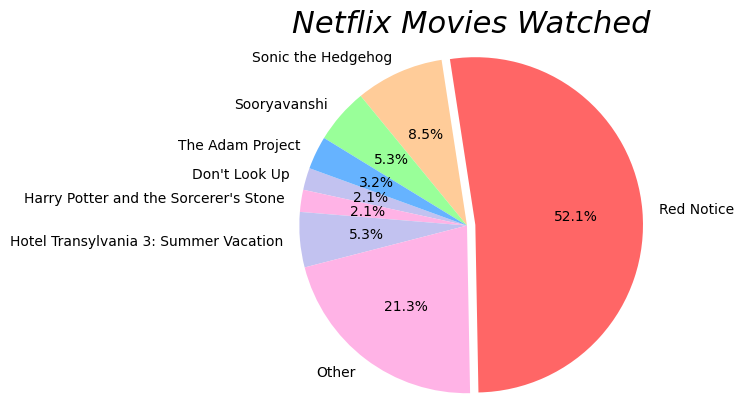

In [ ]:
### Convert the DataFrame to a Pandas DataFrame, and display it as a pie chart
# .toPandas, .plot.pie
import matplotlib.pyplot as plt

most_populr_show = results_df.groupBy('show_title').agg(F.count('country_name')
          .alias('number_of_countries')).orderBy(F.desc('number_of_countries'))
most_populr_show.show()



most_populr_show_df = most_populr_show.toPandas()

# Group movies with less than 60 minutes watched
most_populr_show_df.loc[most_populr_show_df['number_of_countries'] <= 1,
                        'show_title'] = 'Other'
pie_df = most_populr_show_df.groupby('show_title').sum()

# Separate movies with more than 60 minutes watched
pie_df.loc[pie_df['number_of_countries'] >= 60, 'explode'] = 0.1

# Plot the pie chart

explode=[0,0,0,0,0.05,0,0,0]

colors = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6','#ff6666', '#ffcc99',
          '#99ff99', '#66b3ff']
plt.pie(pie_df['number_of_countries'], labels=pie_df.index, autopct='%1.1f%%',
        startangle=160, explode=explode, colors=colors)

plt.axis('equal')
plt.title('Netflix Movies Watched', style='italic', fontsize=22)
#plt.tight_layout()
plt.show()


# Exercise 3 - Most popular shows by country (10 Marks)


1.   Calculate the number of weeks each TV show spent in each country's top 10, across all seasons, such that you don't double count a show when two or more seasons appear in one week. (5 marks)
2.   Produce a DataFrame that contains the show which spent the most time in each country's top 10. (5 marks)

In [ ]:
### Group the data by 'country_name' and 'show_title' and count the number of
### weeks each show appears in each country's top 10 lists, as well as the
### highest weekly ranking. Display the data.
# .groupBy, .agg, F.count_distinct, F.min, .sort, .show

results = (tvDF
          .groupBy('country_name', 'show_title')
          .agg(F.countDistinct('cumulative_weeks_in_top_10')
          .alias('weeks_in_top_10'),
               F.min('weekly_rank').alias('highest_weekly_rank'))
          .sort('country_name', F.desc('weeks_in_top_10'))
         )

results.show()



+------------+--------------------+---------------+-------------------+
|country_name|          show_title|weeks_in_top_10|highest_weekly_rank|
+------------+--------------------+---------------+-------------------+
|   Argentina| Pasión de Gavilanes|             58|                  1|
|   Argentina|Yo soy Betty, la fea|             31|                  6|
|   Argentina|Café con aroma de...|             30|                  1|
|   Argentina|   The Queen of Flow|             25|                  1|
|   Argentina|         Rebelde Way|             12|                  7|
|   Argentina|                Maid|             11|                  1|
|   Argentina|          Squid Game|             11|                  1|
|   Argentina|     Stranger Things|             10|                  1|
|   Argentina|Newly Rich, Newly...|             10|                  1|
|   Argentina|   Pedro el escamoso|              9|                  5|
|   Argentina|         Money Heist|              9|             

In [ ]:
### Find the show that spent the most time in each country's top 10 list.
### Produce and display a table showing that information, along with the number
### of weeks spent in the top 10, and the highest weekly ranking
# .groupBy, .sort, .desc, .agg, F.first, .show

# grouping data by country and show, get the max cumulative_weeks_in_top_10 and its corresponding show_title
max_weeks_dframe = tvDF.groupBy('country_name', 'show_title') \
                    .agg(F.max('cumulative_weeks_in_top_10').alias('max_weeks'))

# joining back to the original dataframe to get the highest weekly ranking
top_show = tvDF.join(max_weeks_dframe, ['country_name', 'show_title']) \
                   .filter(tvDF.cumulative_weeks_in_top_10 == max_weeks_dframe.max_weeks) \
                   .orderBy(['country_name', F.desc('max_weeks')]) \
                   .groupBy('country_name') \
                   .agg(F.first('show_title').alias('show_title'),
                        F.max('cumulative_weeks_in_top_10').alias('max_weeks')
                        )

top_show.show()




+------------------+--------------------+---------+
|      country_name|          show_title|max_weeks|
+------------------+--------------------+---------+
|         Argentina| Pasión de Gavilanes|       58|
|         Australia|     Stranger Things|       13|
|           Austria|     The Good Doctor|       14|
|           Bahamas|SpongeBob SquareP...|       33|
|           Bahrain|          Squid Game|       16|
|        Bangladesh|          Squid Game|       22|
|           Belgium|     Stranger Things|       13|
|           Bolivia| Pasión de Gavilanes|       57|
|            Brazil|         Chiquititas|       51|
|          Bulgaria|          Squid Game|       16|
|            Canada|               Ozark|       14|
|             Chile|Yo soy Betty, la fea|       54|
|          Colombia|Pablo Escobar, el...|       60|
|        Costa Rica| Pasión de Gavilanes|       60|
|           Croatia|          Squid Game|       15|
|            Cyprus|     The Good Doctor|       16|
|    Czech R